## Lesson 1. GIS in Python: Vector Spatial Data

Import shapefile

In [1]:
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et

In [2]:
data_path = et.data.get_data('spatial-vector-lidar')

plot_centroid_path = os.path.join(os.path.expanduser('~'),
                                  'earth-analytics',
                                  'data',
                                  'spatial-vector-lidar',
                                  'california',
                                  'neon-sjer-site',
                                  'vector_data',
                                  'SJER_plot_centroids.shp')

sjer_plot_locations = gpd.read_file(plot_centroid_path)

In [3]:
sjer_plot_locations

,Plot_ID,Point,northing,easting,plot_type,geometry
0,SJER1068,center,4111567.818,255852.376,trees,POINT (255852.376 4111567.818)
1,SJER112,center,4111298.971,257406.967,trees,POINT (257406.967 4111298.971)
2,SJER116,center,4110819.876,256838.760,grass,POINT (256838.760 4110819.876)
3,SJER117,center,4108752.026,256176.947,trees,POINT (256176.947 4108752.026)
4,SJER120,center,4110476.079,255968.372,grass,POINT (255968.372 4110476.079)
5,SJER128,center,4111388.570,257078.867,trees,POINT (257078.867 4111388.570)
6,SJER192,center,4111071.087,256683.434,grass,POINT (256683.434 4111071.087)
7,SJER272,center,4112167.778,256717.467,trees,POINT (256717.467 4112167.778)
8,SJER2796,center,4111533.879,256034.390,soil,POINT (256034.390 4111533.879)
9,SJER3239,center,4109856.983,258497.102,soil,POINT (258497.102 4109856.983)


In [4]:
sjer_plot_locations.geom_type

0     Point
1     Point
2     Point
3     Point
4     Point
5     Point
6     Point
7     Point
8     Point
9     Point
10    Point
11    Point
12    Point
13    Point
14    Point
15    Point
16    Point
17    Point
dtype: object

In [6]:
type(sjer_plot_locations)

geopandas.geodataframe.GeoDataFrame

In [7]:
type(sjer_plot_locations.crs)

pyproj.crs.crs.CRS

In [10]:
sjer_plot_locations.crs

<Projected CRS: EPSG:32611>
Name: WGS 84 / UTM zone 11N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - N hemisphere - 120°W to 114°W - by country
- bounds: (-120.0, 0.0, -114.0, 84.0)
Coordinate Operation:
- name: UTM zone 11N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
type(sjer_plot_locations.total_bounds)

numpy.ndarray

In [9]:
sjer_plot_locations.total_bounds

array([ 254738.618, 4107527.074,  258497.102, 4112167.778])

In [11]:
sjer_plot_locations.shape

(18, 6)

In [12]:
type(sjer_plot_locations.shape)

tuple

<AxesSubplot:>

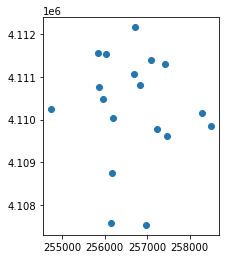

In [15]:
sjer_plot_locations.plot()

<AxesSubplot:>

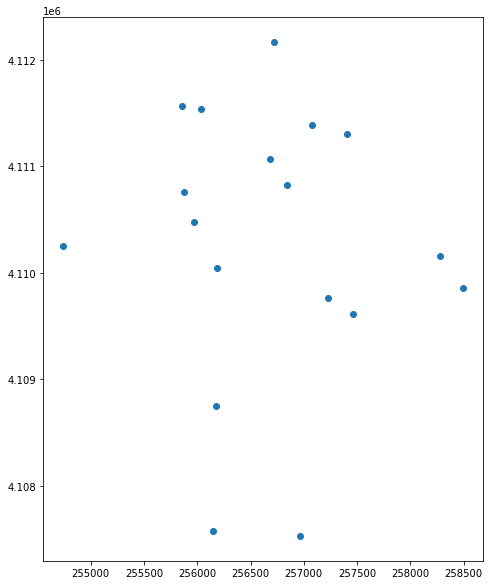

In [16]:
fig, ax = plt.subplots(figsize=(10,10))

sjer_plot_locations.plot(ax=ax)

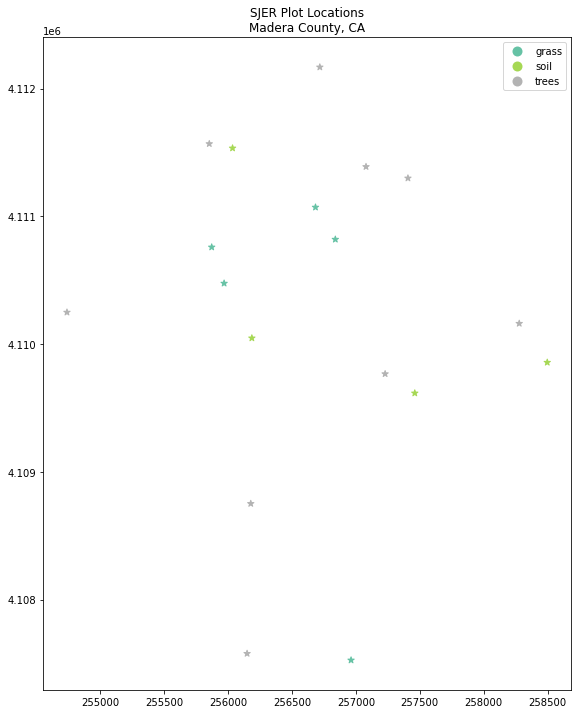

In [28]:
fig, ax = plt.subplots(figsize=(12,12))

sjer_plot_locations.plot(column='plot_type',
                         categorical=True,
                         legend=True,
                         marker='*',
                         markersize=45,
                         cmap='Set2',
                         ax=ax)

ax.set_title('SJER Plot Locations\nMadera County, CA')

plt.show()

Plot multiple layers on the same axis

In [30]:
# Define path to crop boundary shapefile
sjer_crop_extent_path = os.path.join(os.path.expanduser('~'),
                                     'earth-analytics',
                                     'data',
                                     'spatial-vector-lidar',
                                     'california',
                                     'neon-sjer-site',
                                     'vector_data',
                                     'SJER_crop.shp')

# Import crop boundaries
sjer_crop_extent = gpd.read_file(sjer_crop_extent_path)

In [32]:
sjer_crop_extent

,Id,geometry
0,0,"POLYGON ((254570.567 4112361.920, 258867.409 4..."


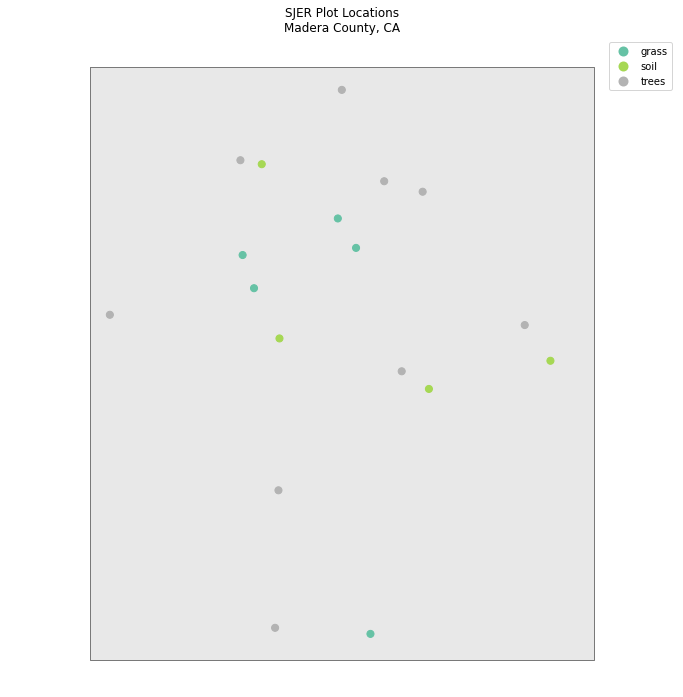

In [31]:
fig, ax = plt.subplots(figsize=(12,12))

sjer_crop_extent.plot(color='lightgrey',
                      edgecolor='black',
                      alpha=0.5,
                      ax=ax)

# Add another layer using the same ax
sjer_plot_locations.plot(column='plot_type',
                         categorical=True,
                         legend=True,
                         markersize=50,
                         cmap='Set2',
                         ax=ax)

ax.set_title('SJER Plot Locations\nMadera County, CA')
ax.set_axis_off()

plt.axis('equal')
plt.show()